# Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

In [2]:
data = pd.read_csv('./data/PPP_data_150k_plus.csv')
data

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,a $5-10 million,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723.0,813920.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,295.0,04/14/2020,"National Cooperative Bank, National Association",AK - 00
1,a $5-10 million,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,99645.0,238190.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,215.0,04/15/2020,First National Bank Alaska,AK - 00
2,a $5-10 million,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,99503.0,722310.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,367.0,04/11/2020,KeyBank National Association,AK - 00
3,a $5-10 million,KATMAI HEALTH SERVICES LLC,"11001 O'MALLEY CENTRE DRIVE, SUITE 204",ANCHORAGE,AK,99515.0,621111.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,04/29/2020,Truist Bank d/b/a Branch Banking & Trust Co,AK - 00
4,a $5-10 million,MATANUSKA TELEPHONE ASSOCIATION,1740 S. CHUGACH ST,PALMER,AK,99645.0,517311.0,Cooperative,Unanswered,Unanswered,Unanswered,NaN,267.0,06/10/2020,CoBank ACB,AK - 00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661213,"e $150,000-350,000",NOT AVAILABLE,NaN,NaN,XX,NaN,339114.0,NaN,Unanswered,Unanswered,Unanswered,NaN,17.0,05/03/2020,"Bank of America, National Association",NA -
661214,"e $150,000-350,000",NOT AVAILABLE,NaN,NaN,XX,NaN,339114.0,NaN,Unanswered,Unanswered,Unanswered,NaN,16.0,05/03/2020,"Bank of America, National Association",NA -
661215,"e $150,000-350,000",NOT AVAILABLE,NaN,NaN,XX,NaN,339114.0,NaN,Unanswered,Unanswered,Unanswered,NaN,14.0,05/03/2020,"Bank of America, National Association",NA -
661216,"e $150,000-350,000",OTTAWA PRODUCTS CO INC,NaN,NaN,XX,NaN,332510.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NA -


# EDA

## Null Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661218 entries, 0 to 661217
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LoanRange      661218 non-null  object 
 1   BusinessName   661210 non-null  object 
 2   Address        661201 non-null  object 
 3   City           661203 non-null  object 
 4   State          661218 non-null  object 
 5   Zip            661202 non-null  float64
 6   NAICSCode      654435 non-null  float64
 7   BusinessType   659789 non-null  object 
 8   RaceEthnicity  661218 non-null  object 
 9   Gender         661218 non-null  object 
 10  Veteran        661218 non-null  object 
 11  NonProfit      42462 non-null   object 
 12  JobsRetained   620712 non-null  float64
 13  DateApproved   661218 non-null  object 
 14  Lender         661218 non-null  object 
 15  CD             661218 non-null  object 
dtypes: float64(3), object(13)
memory usage: 80.7+ MB


Columns with Null Values: ['BusinessName', 'Address', 'City', 'Zip', 'NAICSCode', 'BusinessType', 'NonProfit', 'JobsRetained']

In [4]:
data['BusinessName'].dropna(inplace=True)
data['Address'].dropna(inplace=True)
data['City'].dropna(inplace=True)
data['Zip'].dropna(inplace=True)
data['NAICSCode'].dropna(inplace=True)
data['BusinessType'].dropna(inplace=True)
data['JobsRetained'].dropna(inplace=True)

# For-profit companies have a label 'NaN' for some reason
data['NonProfit'].fillna(value='N', inplace=True)

In [5]:
# Remove states with 'XX'
xx_index = data[data['State'] == 'XX'].index.tolist()
data.drop(xx_index, axis=0, inplace=True)

# Analysis

In [ ]:
# remove letter before range amount
data['LoanRange'] = [x[2:] for x in data['LoanRange']]

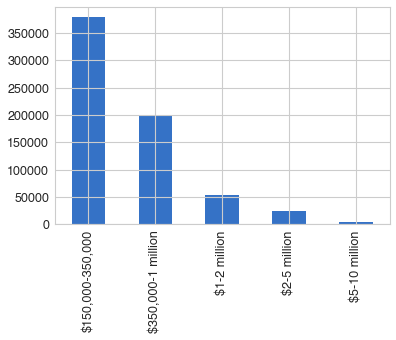

In [28]:
# Total loans per loan range
data['LoanRange'].value_counts().plot.bar()
plt.show();

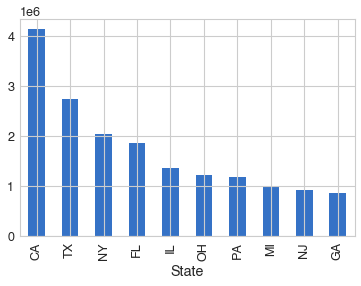

In [25]:
# Total jobs retained by State
data.groupby(by='State')['JobsRetained'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.show();

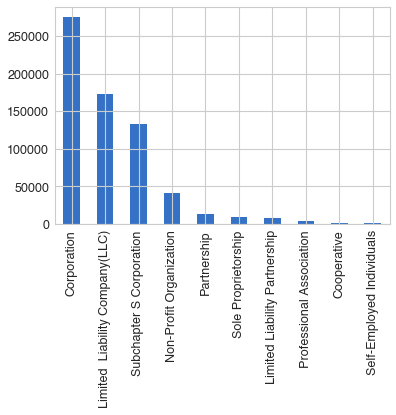

In [26]:
# Total loans by business type
data['BusinessType'].value_counts().head(10).plot.bar()
plt.show();

In [19]:
# Get NAICS code meaning


In [22]:
# Inspect high loan amounts
data[(data['LoanRange'] == '$5-10 million') | (data['LoanRange'] == '$1-2 million') | (data['LoanRange'] == '$2-5 million')]

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,$5-10 million,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723.0,813920.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,295.0,04/14/2020,"National Cooperative Bank, National Association",AK - 00
1,$5-10 million,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,99645.0,238190.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,N,215.0,04/15/2020,First National Bank Alaska,AK - 00
2,$5-10 million,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,99503.0,722310.0,Corporation,Unanswered,Unanswered,Unanswered,N,367.0,04/11/2020,KeyBank National Association,AK - 00
3,$5-10 million,KATMAI HEALTH SERVICES LLC,"11001 O'MALLEY CENTRE DRIVE, SUITE 204",ANCHORAGE,AK,99515.0,621111.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,N,0.0,04/29/2020,Truist Bank d/b/a Branch Banking & Trust Co,AK - 00
4,$5-10 million,MATANUSKA TELEPHONE ASSOCIATION,1740 S. CHUGACH ST,PALMER,AK,99645.0,517311.0,Cooperative,Unanswered,Unanswered,Unanswered,N,267.0,06/10/2020,CoBank ACB,AK - 00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659954,$1-2 million,WHIPPERHILL COMPLIANCE LLC,838 Cottonwood Creek Road,WORLAND,WY,82401.0,541620.0,Subchapter S Corporation,Unanswered,Male Owned,Non-Veteran,N,66.0,05/05/2020,Citizens & Northern Bank,WY - 00
659955,$1-2 million,"WHITE MOUNTAIN OPERATING, LLC",43 Industrial Site Rd,PINEDALE,WY,82941.0,211120.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,N,63.0,04/14/2020,"Zions Bank, A Division of",WY - 00
659956,$1-2 million,WYOMING FINANCIAL INSURANCE,400 E 1st ST,CASPER,WY,82601.0,524210.0,Corporation,Unanswered,Unanswered,Unanswered,N,91.0,04/10/2020,First Interstate Bank,WY - 00
659957,$1-2 million,WYOMING GROCER LLC,1155 S HWY 89,JACKSON,WY,83002.0,445110.0,Partnership,Unanswered,Unanswered,Unanswered,N,133.0,04/29/2020,First Interstate Bank,WY - 00


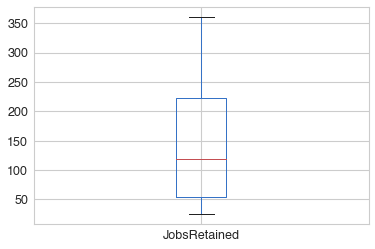

In [31]:
# Average jobs retained by LoanRange
data.groupby(by='LoanRange')['JobsRetained'].mean().sort_values(ascending=False).plot.bar()
plt.show();